<a href="https://colab.research.google.com/github/finesketch/deep_learning/blob/main/3.%20Natural%20Language%20Processing%20in%20TensorFlow/Course3_Part3_Lesson1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7INRKI/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7INRKI/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete7INRKI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 100

history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/100
391/391 [==============================] - 59s 152ms/step - loss: 0.3632 - accuracy: 0.8358 - val_loss: 0.5858 - val_accuracy: 0.7500
Epoch 2/100
391/391 [==============================] - 60s 153ms/step - loss: 0.3006 - accuracy: 0.8759 - val_loss: 0.6392 - val_accuracy: 0.6660
Epoch 3/100
391/391 [==============================] - 60s 154ms/step - loss: 0.2371 - accuracy: 0.9076 - val_loss: 0.6002 - val_accuracy: 0.7810
Epoch 4/100
391/391 [==============================] - 60s 155ms/step - loss: 0.1609 - accuracy: 0.9427 - val_loss: 0.5861 - val_accuracy: 0.7830
Epoch 5/100
391/391 [==============================] - 59s 152ms/step - loss: 0.1022 - accuracy: 0.9655 - val_loss: 0.6422 - val_accuracy: 0.8181
Epoch 6/100
391/391 [==============================] - 59s 151ms/step - loss: 0.0760 - accuracy: 0.9759 - val_loss: 0.7233 - val_accuracy: 0.7924
Epoch 7/100
391/391 [==============================] - 62s 157ms/step - loss: 0.0606 - accuracy: 0.9825 - val_loss: 0.7902 -

In [1]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

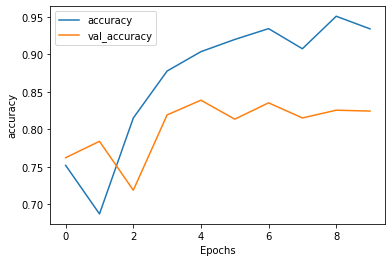

In [10]:
plot_graphs(history, 'accuracy')

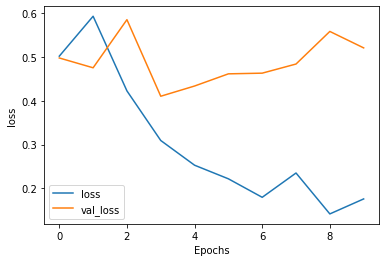

In [11]:
plot_graphs(history, 'loss')